In [240]:
import matplotlib.pyplot as plt
import pandas as pd

In [241]:
#Read the csv file
df = pd.read_csv("Sweden-2021-feb-spike.csv", sep=',') #Feb 2021 Spike from Sweden
#df = pd.read_csv("USPandas_processed2.csv",sep=',') #Dec 2017 Spike from US
#df.columns = ['','date','country_name','count','host'] #US
df.columns = ['','date','country_name','host','count'] #SW
plt.rcParams["figure.figsize"] = [8.00, 5.00]
plt.rcParams["figure.autolayout"] = True

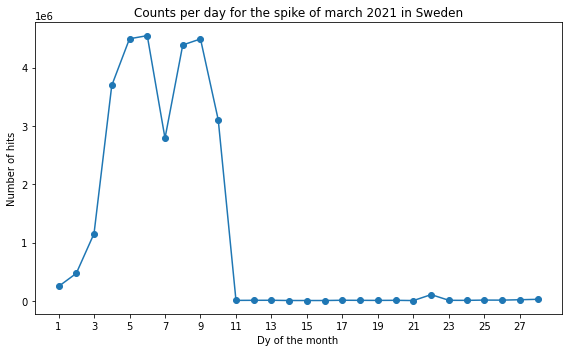

In [242]:
grouped_data = df.groupby('date')['count'].sum()

plt.plot(grouped_data.index, grouped_data.values, marker='o')

plt.xlabel('Dy of the month')
#plt.xticks(grouped_data.index)
plt.xticks(grouped_data.index[::2])
plt.ylabel('Number of hits')
#plt.title('Counts per day for the spike of december 2017 in the United States')
plt.title('Counts per day for the spike of march 2021 in Sweden')
plt.show()

['www.google.com', 'www.youtube.com', 'm.facebook.com', 't.co', 'www.reddit.com', 'www.google.se', 'duckduckgo.com', 'rx.linkfanel.net', '350685531728', 'com.google.android.gm']


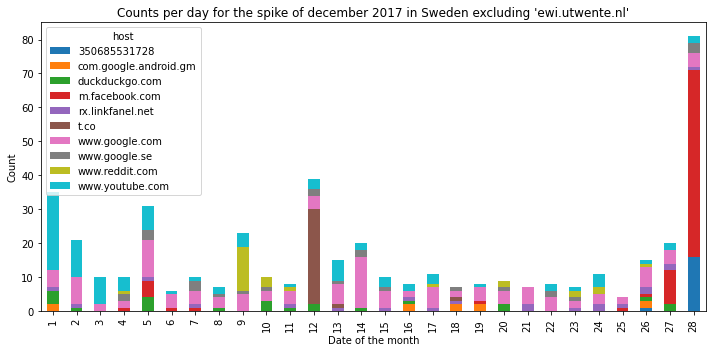

In [243]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('utwente').any(), axis=1)]

websites_df = df.groupby(['host'])['count'].sum().reset_index()
websites_df = websites_df.sort_values(by='count', ascending = False)
top_df = websites_df.head(10)
website_list = top_df['host'].tolist()
df = df[df['host'].isin(website_list)]
print(website_list)

plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df = df.groupby(['date', 'host'])['count'].sum().reset_index()
df = df.pivot(index='date', columns='host', values='count')
df.plot(kind='bar', stacked=True, legend=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Date of the month')
plt.ylabel('Count')
#plt.title("Counts per day for the spike of december 2017 in the United States excluding 'ewi.utwente.nl'")
plt.title("Counts per day for the spike of december 2017 in Sweden excluding 'ewi.utwente.nl'")
plt.show()